<a href="https://colab.research.google.com/github/YazGonzalezHerrera/Metodos-numericos/blob/main/Ejercicio%20Influenza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomios resultantes: 
 x = [1.0,2.0]
1.0*x**3 - 3.0*x**2 + 4.0*x - 1.0
 x = [2.0,3.0]
2.75*x**3 - 13.5*x**2 + 18.25*x - 1.5
 x = [3.0,4.0]
-3.75*x**3 + 45.0*x**2 - 157.25*x + 174.0


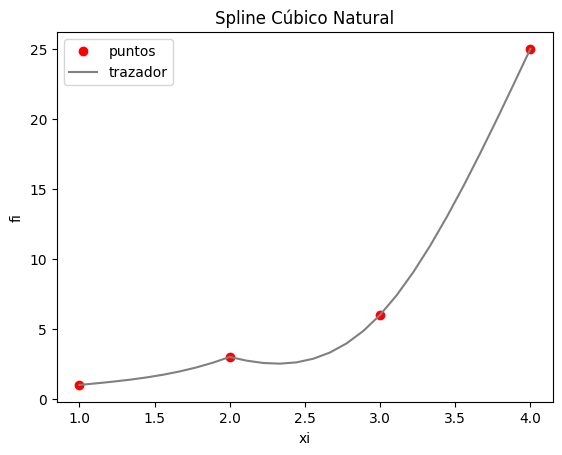

In [1]:
#Ejemplo epidemia de influenza
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def traza3natural(xi,yi):
    n = len(xi)

    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]

    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,0] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)

    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)

    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0

    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]

    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]

        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)

    return(px_tabla)

#Ingresamos los datos de nuestro ejemplo
xi = np.array([1.0 , 2.0, 3.0, 4.0])
fi = np.array([1.0, 3.0, 6.0, 25.0])
muestras = 10

n = len(xi)
px_tabla = traza3natural(xi,fi)

print('Polinomios resultantes: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

#Datos para saber la gráfica
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='gray')
plt.title('Spline Cúbico Natural')
plt.xlabel('xi')
plt.ylabel('fi')
plt.legend()
plt.show()